## Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.



1. **make_model:** Contains the make and model information of the vehicles.
2. **body_type:** Indicates the body type of the vehicles (e.g., sedan, hatchback).
3. **price:** Contains the price information of the vehicles.
4. **vat:** Contains value-added tax (VAT) information (often important in vehicle sales).
5. **km:** Contains the mileage information of the vehicles.
6. **type:** Indicates the type of the vehicle (e.g., new, used).
7. **fuel:** Indicates the type of fuel used (e.g., petrol, diesel).
8. **gears:** Contains the number of gears in the vehicles.
9. **comfort_convenience:** Contains the comfort and convenience features of the vehicles.
10. **entertainment_media:** Contains entertainment and media features.
11. **extras:** Contains the extra features of the vehicles.
12. **safety_security:** Contains safety features.
13. **age:** The age of the vehicles.
14. **previous_owners:** Contains the number of previous owners of the vehicles.
15. **hp_kw:** Contains the horsepower of the vehicles in kilowatts.
16. **inspection:** Contains information about whether the vehicle has a new inspection.
17. **paint_type:** Contains the type of paint of the vehicles.
18. **upholstery_type:** Contains the type of upholstery in the vehicles.
19. **gearing_type:** Indicates the type of transmission in the vehicles.
20. **cc:** Indicates the engine displacement in cubic centimeters (cc).
21. **weight_kg:** Indicates the weight of the vehicles in kilograms.
22. **drive_chain:** Indicates the type of drive train in the vehicles (e.g., front-wheel drive, rear-wheel drive).
23. **cons_comb:** Indicates the combined fuel consumption of the vehicles in liters per 100 kilometers.



# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
 
%matplotlib inline
#%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 100)


In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")
df

,make_model,body_type,price,vat,km,Type,Fuel,Gears,Comfort_Convenience,Entertainment_Media,Extras,Safety_Security,age,Previous_Owners,hp_kW,Inspection_new,Paint_Type,Upholstery_type,Gearing_Type,Displacement_cc,Weight_kg,Drive_chain,cons_comb
0,Audi A1,Sedans,15770,VAT deductible,56013.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,2.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1220.0,front,3.8
1,Audi A1,Sedans,14500,Price negotiable,80000.000000,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",2.0,1.0,141.0,0,Metallic,Cloth,Automatic,1798.0,1255.0,front,5.6
2,Audi A1,Sedans,14640,VAT deductible,83450.000000,Used,Diesel,7.0,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",3.0,1.0,85.0,0,Metallic,Cloth,Automatic,1598.0,1135.0,front,3.8
3,Audi A1,Sedans,14500,VAT deductible,73000.000000,Used,Diesel,6.0,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",3.0,1.0,66.0,0,Metallic,Cloth,Automatic,1422.0,1195.0,front,3.8
4,Audi A1,Sedans,16790,VAT deductible,16200.000000,Used,Diesel,7.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",3.0,1.0,66.0,1,Metallic,Cloth,Automatic,1422.0,1135.0,front,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15910,Renault Espace,Van,39950,VAT deductible,1647.362609,New,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3
15911,Renault Espace,Van,39885,VAT deductible,9900.000000,Used,Benzine,7.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",0.0,1.0,165.0,0,Metallic,Cloth,Automatic,1798.0,1708.0,front,7.4
15912,Renault Espace,Van,39875,VAT deductible,15.000000,Pre-registered,Diesel,6.0,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",0.0,1.0,146.0,1,Metallic,Part/Full Leather,Automatic,1997.0,1734.0,front,5.3
15913,Renault Espace,Van,39700,VAT deductible,10.000000,Pre-registered,Diesel,6.0,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",0.0,1.0,147.0,0,Metallic,Part/Full Leather,Automatic,1997.0,1758.0,front,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15915 entries, 0 to 15914
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15915 non-null  object 
 1   body_type            15915 non-null  object 
 2   price                15915 non-null  int64  
 3   vat                  15915 non-null  object 
 4   km                   15915 non-null  float64
 5   Type                 15915 non-null  object 
 6   Fuel                 15915 non-null  object 
 7   Gears                15915 non-null  float64
 8   Comfort_Convenience  15915 non-null  object 
 9   Entertainment_Media  15915 non-null  object 
 10  Extras               15915 non-null  object 
 11  Safety_Security      15915 non-null  object 
 12  age                  15915 non-null  float64
 13  Previous_Owners      15915 non-null  float64
 14  hp_kW                15915 non-null  float64
 15  Inspection_new       15915 non-null 

In [4]:
df.rename(columns={"make_model" : "model",
                   "Inspection_new" : "inspection",
                   "Displacement_cc" : "cc"}, inplace=True)

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['model', 'body_type', 'price', 'vat', 'km', 'type', 'fuel', 'gears',
       'comfort_convenience', 'entertainment_media', 'extras',
       'safety_security', 'age', 'previous_owners', 'hp_kw', 'inspection',
       'paint_type', 'upholstery_type', 'gearing_type', 'cc', 'weight_kg',
       'drive_chain', 'cons_comb'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,15915.0,18024.380584,7381.679318,4950.0,12850.0,16900.0,21900.0,74600.0
km,15915.0,32089.995708,36977.214964,0.0,1920.5,20413.0,46900.0,317000.0
gears,15915.0,5.937355,0.704772,5.0,5.0,6.0,6.0,8.0
age,15915.0,1.389695,1.121306,0.0,0.0,1.0,2.0,3.0
previous_owners,15915.0,1.042853,0.339178,0.0,1.0,1.0,1.0,4.0
hp_kw,15915.0,88.499340,26.674341,40.0,66.0,85.0,103.0,294.0
inspection,15915.0,0.247063,0.431317,0.0,0.0,0.0,0.0,1.0
cc,15915.0,1428.661891,275.804272,890.0,1229.0,1461.0,1598.0,2967.0
weight_kg,15915.0,1337.700534,199.682385,840.0,1165.0,1295.0,1472.0,2471.0
cons_comb,15915.0,4.832124,0.867530,3.0,4.1,4.8,5.4,9.1


In [7]:
df.describe(include="object").T

,count,unique,top,freq
model,15915,9,Audi A3,3097
body_type,15915,8,Sedans,8004
vat,15915,2,VAT deductible,15044
type,15915,5,Used,11095
fuel,15915,4,Benzine,8548
comfort_convenience,15915,6196,"Air conditioning,Electrical side mirrors,Hill ...",388
entertainment_media,15915,346,"Bluetooth,Hands-free equipment,On-board comput...",1737
extras,15915,659,Alloy wheels,5785
safety_security,15915,4442,"ABS,Central door lock,Daytime running lights,D...",729
paint_type,15915,3,Metallic,15246


In [10]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count * 100, 2)
missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage})
missing_df

,count,percentage
model,0,0.0
body_type,0,0.0
price,0,0.0
vat,0,0.0
km,0,0.0
type,0,0.0
fuel,0,0.0
gears,0,0.0
comfort_convenience,0,0.0
entertainment_media,0,0.0


In [9]:
for i in df.select_dtypes("object"):
    print(f"{i:<30}:", df[i].unique())

model                         : ['Audi A1' 'Audi A2' 'Audi A3' 'Opel Astra' 'Opel Corsa' 'Opel Insignia'
 'Renault Clio' 'Renault Duster' 'Renault Espace']
body_type                     : ['Sedans' 'Station wagon' 'Compact' 'Coupe' 'Van' 'Off-Road' 'Convertible'
 'Transporter']
vat                           : ['VAT deductible' 'Price negotiable']
type                          : ['Used' "Employee's car" 'New' 'Demonstration' 'Pre-registered']
fuel                          : ['Diesel' 'Benzine' 'LPG/CNG' 'Electric']
comfort_convenience           : ['Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Light sensor,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system'
 'Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Parking assist system sensors rear,Power windows,S

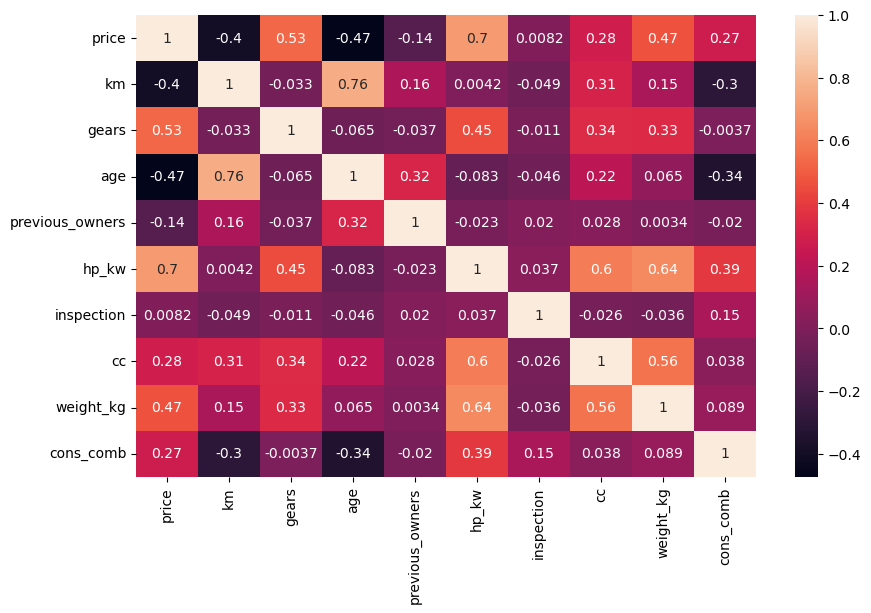

In [11]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

In [15]:
def color_red_val(val):
    if val > 0.90 and val < 0.99:
        color = 'red'
    elif val >= 1:
        color = 'blue'
    else:
        color = 'white'
    return f' color:{color}'

In [16]:
pd.DataFrame(df).corr(numeric_only = True).style.applymap(color_red_val)

,price,km,gears,age,previous_owners,hp_kw,inspection,cc,weight_kg,cons_comb
price,1.000000,-0.399291,0.530291,-0.473478,-0.144628,0.696411,0.008180,0.281824,0.468433,0.272261
km,-0.399291,1.000000,-0.033171,0.758306,0.157041,0.004217,-0.049443,0.306774,0.147098,-0.300198
gears,0.530291,-0.033171,1.000000,-0.064524,-0.036612,0.449793,-0.011096,0.339507,0.333928,-0.003733
age,-0.473478,0.758306,-0.064524,1.000000,0.316108,-0.083254,-0.045511,0.215266,0.064883,-0.341303
previous_owners,-0.144628,0.157041,-0.036612,0.316108,1.000000,-0.022556,0.019545,0.027958,0.003443,-0.020172
hp_kw,0.696411,0.004217,0.449793,-0.083254,-0.022556,1.000000,0.036608,0.597485,0.638310,0.388912
inspection,0.008180,-0.049443,-0.011096,-0.045511,0.019545,0.036608,1.000000,-0.025983,-0.035517,0.147814
cc,0.281824,0.306774,0.339507,0.215266,0.027958,0.597485,-0.025983,1.000000,0.563375,0.037814
weight_kg,0.468433,0.147098,0.333928,0.064883,0.003443,0.638310,-0.035517,0.563375,1.000000,0.088932
cons_comb,0.272261,-0.300198,-0.003733,-0.341303,-0.020172,0.388912,0.147814,0.037814,0.088932,1.000000


In [17]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

model               : 9
body_type           : 8
vat                 : 2
type                : 5
fuel                : 4
comfort_convenience : 6196
entertainment_media : 346
extras              : 659
safety_security     : 4442
paint_type          : 3
upholstery_type     : 2
gearing_type        : 3
drive_chain         : 3


In [18]:
df.model.value_counts()

model
Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2525
Opel Corsa        2216
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: count, dtype: int64

In [19]:
df.drop()

SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (314436700.py, line 1)

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## random state=42

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## random state = 42

## Feature Importance 

## 7. Visually Compare Models Performance In a Graph

## Prediction new observation

## random state=42

# !! (Dont forget Grid-Search)!!





# Congratulations

# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Modelling_Auto_Scout_Project</b></p>
![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Watsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [Linkedin](https://www.linkedin.com/company/techproeducation/mycompany/) |